In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import clear_session

In [7]:
# load data
np_data = np.load("data/dataRS.npy")

noise_output = np_data[:,-1].reshape(len(np_data),1)
input = np_data[:,:-1]

# split data
test_split = 0.33
x_train, x_test, y_train, y_test = train_test_split(input, noise_output, test_size=test_split)

### Enter your tag as unique id for saving

In [8]:
import time
timestr = time.strftime("%d%m%Y")
tag = str("sNN-"+timestr)

In [16]:
#Create a simple ANN
clear_session()
layer_0 = Input(shape=(x_train.shape[1],))
layer_1 = Dense(7, activation="relu")
layer_2 = Dense(15, activation="relu")
layer_3 = Dense(1, activation="linear")
ann = Sequential([layer_0, layer_1, layer_2, layer_3])
ann.summary()

plot_model(ann)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 42        
                                                                 
 dense_1 (Dense)             (None, 15)                120       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
ann.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
ann_history = ann.fit(x_train, y_train, epochs=250, batch_size=25, validation_split=0.25)

Epoch 1/250
31/31 [==============================] - 1s 9ms/step - loss: 15574.9590 - mean_squared_error: 15574.9590 - mean_absolute_error: 124.6032 - val_loss: 15635.9307 - val_mean_squared_error: 15635.9307 - val_mean_absolute_error: 124.8869
Epoch 2/250
31/31 [==============================] - 0s 3ms/step - loss: 15445.6797 - mean_squared_error: 15445.6797 - mean_absolute_error: 124.0830 - val_loss: 15477.3428 - val_mean_squared_error: 15477.3428 - val_mean_absolute_error: 124.2489
Epoch 3/250
31/31 [==============================] - 0s 3ms/step - loss: 15284.3828 - mean_squared_error: 15284.3828 - mean_absolute_error: 123.4292 - val_loss: 15303.1260 - val_mean_squared_error: 15303.1260 - val_mean_absolute_error: 123.5440
Epoch 4/250
31/31 [==============================] - 0s 3ms/step - loss: 15087.3125 - mean_squared_error: 15087.3125 - mean_absolute_error: 122.6247 - val_loss: 15083.0195 - val_mean_squared_error: 15083.0195 - val_mean_absolute_error: 122.6473
Epoch 5/250
31/31 [=

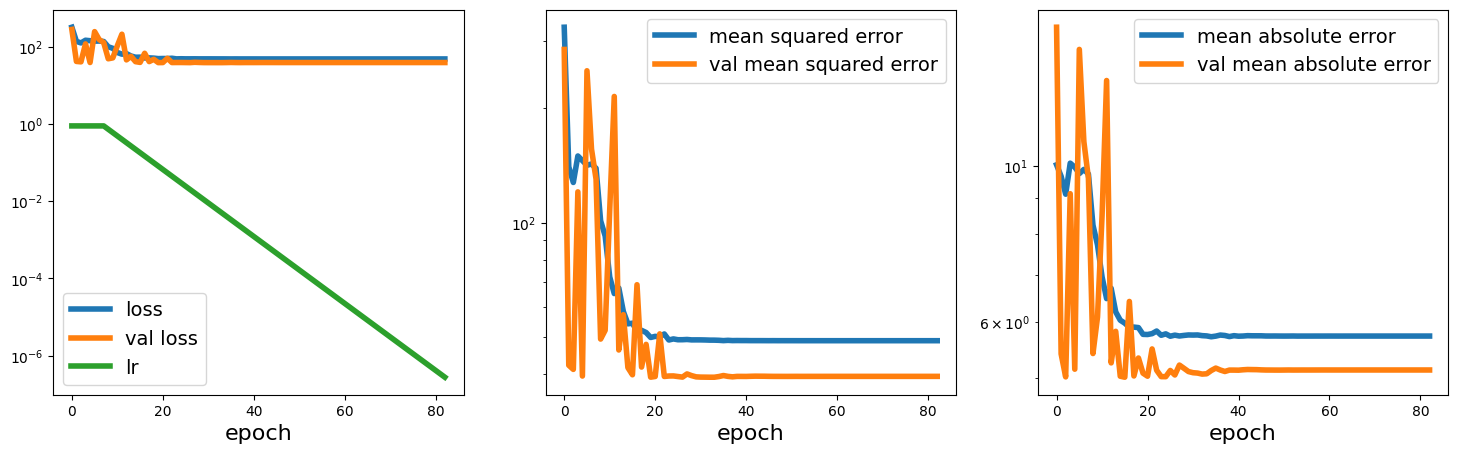

In [12]:
def plot_metrics(history):
    n = len(history.history.keys())//2
    fig,axs = plt.subplots(1,n, figsize=(18,5))

    for i,[key,val] in enumerate(history.history.items()):
        axs[i%n].plot(history.history[key], lw=4, label=key.replace("_", " "))
    
    for ax in axs:
        ax.set_yscale("log")
        ax.set_xlabel("epoch", fontsize=16)
        ax.legend(fontsize=14)
plot_metrics(ann_history)

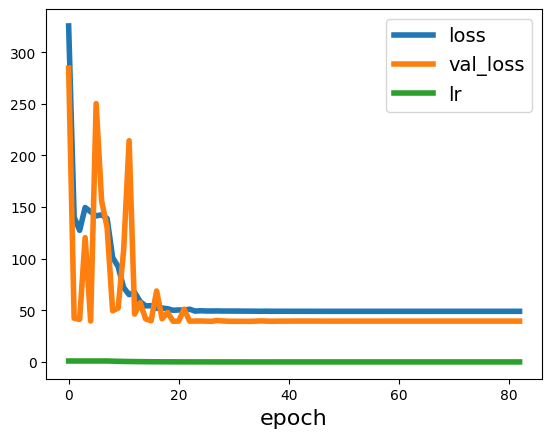

In [13]:
fig = plt.figure()
plt.plot(ann_history.history['loss'], lw=4, label='loss')
plt.plot(ann_history.history['val_loss'], lw=4, label='val_loss')
plt.plot(ann_history.history['lr'], lw=4, label='lr')
plt.xlabel("epoch", fontsize=16)
plt.legend(fontsize=14)
plt.show()
fig.savefig("archive/history-"+tag+".png")

In [ ]:
evaluation = ann.evaluate(x_test[:-1], y_test[:-1])

16/16 [==============================] - 0s 2ms/step - loss: 24.1454 - mean_squared_error: 24.1454 - mean_absolute_error: 3.8855


In [ ]:
ann.save("archive/model-"+tag+".h5")
config = ann.get_config()
np.save("archive/config-"+tag+".npy", config)